# Práctica 3

## Ejercicio 2

## Autores : Jorge Martín Pastor y Juan Serrano Vara

## 26 nov 2018

<h1 align = "center" style="background-color:powderblue;"> Importamos las librerias</h1>


In [1]:
% reset
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### A continuación se muestra las librerias utilizadas para dibujar el árbol

#### Comando para descargalas desde anaconda promt

pip install graphviz

In [2]:
## LIBRERIAS PARA DIBUJAR EL ÁRBOL
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

from graphviz import Source
from sklearn import tree

<h1 align = "center" style="background-color:powderblue;"> Importamos los datos</h1>


In [3]:
datos = pd.read_csv('mushrooms.csv',)
datos

,Venenosa,Sombrero_forma,Sombrero_superficie,Sombrero_color,Moretones,Olor,Laminas_colocacion,Laminas_esparcimiento,Laminas_tamaño,Laminas_color,...,Tallo_debajo_superficie,Tallo_color1,Tallo_color2,Velo_tipo,Velo_color,Anillo_numero,Anillo_tipo,Esporas_color,Poblacion,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


<h1 align = "center" style="background-color:powderblue;"> Preprocesamiento de los datos</h1>


# Categorización de las variables

In [4]:
# Extraemos todos los nombres de las columnas
nombres = datos.columns.values.tolist()

# Categorizamos de todas las columnas
for i in nombres:
    datos[i] = datos[i].astype('category').cat.codes.astype(int)
datos

,Venenosa,Sombrero_forma,Sombrero_superficie,Sombrero_color,Moretones,Olor,Laminas_colocacion,Laminas_esparcimiento,Laminas_tamaño,Laminas_color,...,Tallo_debajo_superficie,Tallo_color1,Tallo_color2,Velo_tipo,Velo_color,Anillo_numero,Anillo_tipo,Esporas_color,Poblacion,Habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


# Conjunto de entrenamiento y validación

In [5]:
# Setas
X = datos.drop('Venenosa', axis=1) 

# Etiquetas
Y= datos['Venenosa']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20) 

<h1 align = "center" style="background-color:powderblue;"> EJERCICIO 1: Crea un clasificador en el que uses al menos dos criterios de división distintos. Calcula el error en
cada uno de ellos y elige el qué mejor clasifique</h1>

# Árboles de decisión

La validación del modelo se podría realizar con score, pero hemos preferido realizarlo nosotros manualmente prediciendo y comparando con el resultado esperado. 

<h1 style="background-color:powderblue;">Configuración 1</h1>

Probamos con el cirteri de decisión gini

In [7]:
# creamos el clasificador
classifierGini = DecisionTreeClassifier(criterion ="gini")  

# entrenamos el clasificador
classifierGini.fit(X_train, y_train)

# evaluamos el clasificador
y_pred = classifierGini.predict(X_test)  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[836   0]
 [  0 789]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       836
          1       1.00      1.00      1.00       789

avg / total       1.00      1.00      1.00      1625



### Explicación de las variables de la tabla mostrada con anterioridad

<img src="explicacion precision.png"/>

<h1 style="background-color:powderblue;">Configuración 2</h1>

Probamos con el cirterio de decisión entropy

In [8]:
classifierEntropy = DecisionTreeClassifier(criterion ="entropy")  
classifierEntropy.fit(X_train, y_train)

y_pred = classifierEntropy.predict(X_test)  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[836   0]
 [  0 789]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       836
          1       1.00      1.00      1.00       789

avg / total       1.00      1.00      1.00      1625



<h1 align = "center" style="background-color:powderblue;">EJERCICO 2: Dibuja el modelo elegido en el punto anterior. </h1>

La primera posición del array (value) indica las setas que no son venenosa, la segunda posición las que si los son.

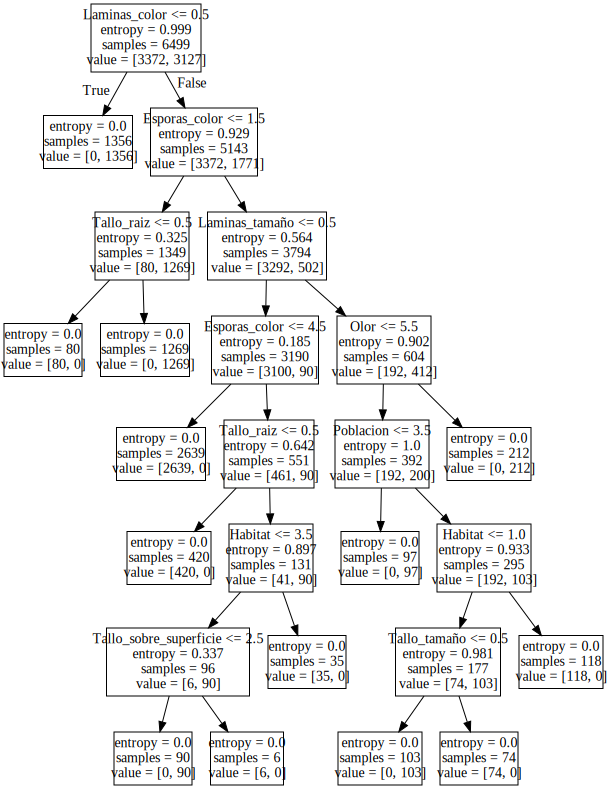

In [17]:
Source(tree.export_graphviz(classifierEntropy, out_file=None, feature_names=X_train.columns))

<h1 align = "center" style="background-color:powderblue;">EJERCICIO 3: Selecciona tres reglas que sean las que generalicen lo menos posible e interprétalas. </h1>

### Reglas 1-7

Atención: El siguiente código no va a compilar ya que las variables no estan definidas, simplemente se ha realizado para hacer una interpretación

In [10]:
if (Laminas_Color <= 0.5):
    
    # Regla 1
    print('La seta SI es venenosa')

# Vamos por el camino falso
else:
    
    if(Esporas_color <=1.5):
        
        print('Sería otra regla, otro camino diferente')
        
    # Vamos por el camino falso
    else:
        
        #Vamos por el camino verdadero
        if(Laminas_Tamaño <= 0.5):
            
            if(Esporas_color <=4.5):
                
                #Relgla 2
                print('La seta NO es venenosa')
                
            else:
                if(Tallo_raiz <=0.5):
                    
                    #Regla 3
                    print('La seta NO es venenosa')
                    
                else:
                    if(Habitad <=3.5):
                        
                        # Regla 4
                        if (Tallo_sobre_superficie <=2.5):
                            
                            # Regla 5
                            print('La seta SI es venenosa')
                            
                        else:
                            
                            #Regla 6
                            print('La seta NO es venenosa')
                    
                    else:
                        #Regla 7
                        print('La seta NO es venenosa') 

NameError: name 'Laminas_Color' is not defined

 Como podemos comprobar al principio de el árbol si se cumple la primera condición ya tenemos una seta que no es venenosa, pero sería una regla que esta generalizando demasiado, por eso decidimos realizar el camino complemto, hasta el último nodo del árbol. Por el camino nos vamos encontrado nuevas relgas que nos indican si una seta es venenosa o no.
    
    
    
    

<h1 align = "center" style="background-color:powderblue;">EJERCICIO 4: Usa tu clasificador para decidir si son venenos o no la “amanita muscaria” y la “amanaita cesarea”. </h1>

In [15]:
Amanita_Muscaria = [[0, 3, 4, 0, 3, 1, 0, 0, 8, 3, 4, 0, 0, 0, 1, 0, 4, 0, 5, 4, 1, 2]]

print(classifierGini.predict(Amanita_Muscaria, check_input=True))

print('La Amanita Muscaria SI es venenosa')

Amanita_Cesarea = [[0, 3, 1, 1, 2, 0, 0, 1, 11, 1, 1, 0, 0, 0, 0, 0, 0, 1, 3, 4, 2, 3]]

print(classifierGini.predict(Amanita_Cesarea, check_input=True))

print('La Amanita Cesarea NO es venenosa')


[1]
La Amanita Muscaria SI es venenosa
[0]
La Amanita Cesarea NO es venenosa


<h1 align = "center" style="background-color:powderblue;"> Bibliografía</h1>

Árboles de decisión: https://scikit-learn.org/stable/modules/tree.html

Árboles de decisión: https://stackabuse.com/decision-trees-in-python-with-scikit-learn/